## Loading Data

### Read Csv

In [100]:
import pandas as pd

df = pd.read_csv('../Datasets/indonesian-abusive-and-hate-speech-twitter-text/data.csv', encoding='latin-1')

### Grouping The Data

In [101]:
positive_both = df[(df['HS'] == 1) & (df['Abusive'] == 1)].drop(columns=['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
positive_hs = df[(df['HS'] == 1) & (df['Abusive'] == 0)].drop(columns=['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
positive_a = df[(df['HS'] == 0) & (df['Abusive'] == 1)].drop(columns=['HS','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
negative = df[(df['HS'] == 0) & (df['Abusive'] == 0)].drop(columns=['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])

In [102]:
positive_both = positive_both.rename(columns={'Tweet':'text','HS':'label'})
positive_both.count()

text     3295
label    3295
dtype: int64

In [103]:
positive_hs = positive_hs.rename(columns={'Tweet':'text','HS':'label'})
positive_hs.count()

text     2266
label    2266
dtype: int64

In [104]:
positive_a = positive_a.rename(columns={'Tweet':'text','Abusive':'label'})
positive_a.count()

text     1748
label    1748
dtype: int64

In [105]:
negative = negative.rename(columns={'Tweet':'text','HS':'label'})
negative.count()

text     5860
label    5860
dtype: int64

In [106]:
df = pd.concat([positive_hs, positive_a, positive_both, negative], ignore_index=True)

In [107]:
null_per_column = df.isnull().sum()
print("Null values per column:\n", null_per_column)
total_duplicates = df.duplicated().sum()
print("Total duplicate rows in DataFrame:", total_duplicates)

Null values per column:
 text     0
label    0
dtype: int64
Total duplicate rows in DataFrame: 140


In [108]:
df = df.dropna().drop_duplicates()

In [109]:
null_per_column = df.isnull().sum()
print("Null values per column:\n", null_per_column)
total_duplicates = df.duplicated().sum()
print("Total duplicate rows in DataFrame:", total_duplicates)

Null values per column:
 text     0
label    0
dtype: int64
Total duplicate rows in DataFrame: 0


In [110]:
df.head()

,text,label
0,Aktor huruhara 98 Prabowo S ingin lengserkan p...,1
1,RT USER USER USER PKI hanya muncul jika jelang...,1
2,USER USER USER USER USER USER USER USER USER I...,1
3,pinokio umur 3 taonan tuh. #2019GantiPresiden,1
4,RT USER benci sekali dgn Umat Islam,1


### Checking the data balance

In [111]:
df[df['label'] == 0].count()

text     5783
label    5783
dtype: int64

In [112]:
df[df['label'] == 1].count()

text     7246
label    7246
dtype: int64

<Axes: xlabel='label', ylabel='count'>

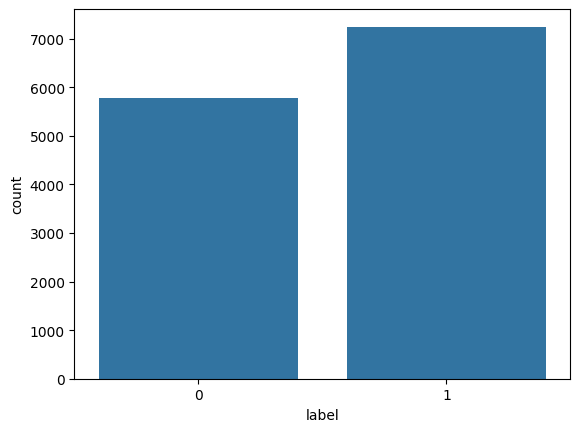

In [113]:
import seaborn as sns

sns.countplot(x='label', data=df)

## Preprocessing Data

### Create functions to process text data

In [114]:
import re

def lowercase(text):
  return text.lower()

def remove_stair(text):
  return re.sub('#',' ',text)

def remove_enter(text):
  return re.sub('\n',' ',text)

def remove_retweet(text):
  return re.sub('rt',' ',text)

def remove_user(text):
  return re.sub('user',' ',text)

def remove_url(text):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)

def remove_unicode(text):
  text = re.sub(r'\bx[a-fA-F0-9]{2}\b', ' ', text)
  text = re.sub(r'\bx([a-fA-F0-9]{2})', ' ', text)
  return text

def remove_nonaplhanumeric(text):
  return re.sub('[^a-zA-Z]+', ' ', text)

alay = pd.read_csv('../Datasets/indonesian-abusive-and-hate-speech-twitter-text/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = dict(zip(alay[0], alay[1]))
def normalize_alay(text):
  return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])


# stopwords = pd.read_csv('../Datasets/indonesian-stoplist/stopwordbahasa.csv', encoding='utf-8', header=None)[0].values.tolist()
unneeded_words = ['uniform', 'resource', 'locator', 'gue', 'ya', 'nya', 'sih']
indonesian_stopwords = unneeded_words
def remove_stopword(text):
  text = ' '.join(['' if word in indonesian_stopwords else word for word in text.split(' ')])
  text = remove_extra_spaces(text)
  text = text.strip()
  return text

def remove_extra_spaces(text):
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

In [115]:
def clean_text(text):
  text = lowercase(text)
  text = remove_stair(text)
  text = remove_enter(text)
  text = remove_retweet(text)
  text = remove_user(text)
  text = remove_url(text)
  text = remove_unicode(text)
  text = remove_nonaplhanumeric(text)
  text = normalize_alay(text)
  text = remove_extra_spaces(text)
  text = remove_stopword(text)
  text = remove_extra_spaces(text)
  return text

### Applying text cleaner function

In [116]:
df['text'] = df['text'].apply(clean_text)
df.head(100)

,text,label
0,aktor huru hara prabowo si ingin lengserkan pe...,1
1,partai komunis indonesia hanya muncul jika jel...,1
2,islam nusantara produk jil dipasarkan dengan g...,1
3,pinokio umur tahunan itu ganti presiden,1
4,benci sekali dengan umat islam,1
...,...,...
95,tidak apa ahok pernah dibilang penista agama t...,1
96,tidak salah memang amp bilang antek asing tapi...,1
97,pencitraan kamu ah prabowo masih tidur,1
98,prabowo sudah tua perlu generasi muda yang bis...,1


### Deleting data that has string empty text

In [117]:
df = df[df['text'] != '']

<Axes: xlabel='label', ylabel='count'>

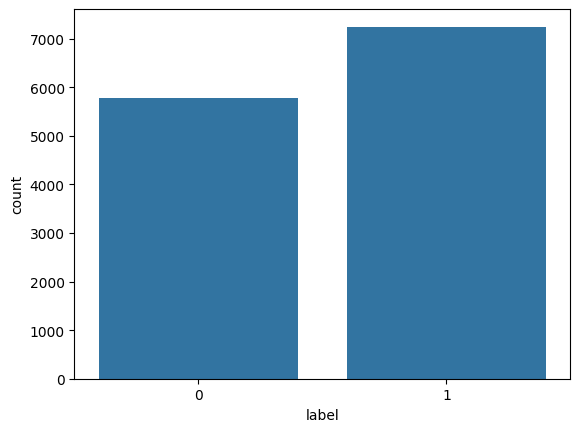

In [118]:
import seaborn as sns

sns.countplot(x='label', data=df)

In [119]:
# Separate DataFrames for label 0 and label 1
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# Get the minimum size of both groups to balance them
min_size = min(len(df_label_0), len(df_label_1))

# Randomly sample from both groups to balance
df_label_0_balanced = df_label_0.sample(n=min_size, random_state=42)
df_label_1_balanced = df_label_1.sample(n=min_size, random_state=42)

# Concatenate the two balanced DataFrames
df = pd.concat([df_label_0_balanced, df_label_1_balanced])

# Shuffle the rows to mix the labels
df = df.sample(frac=1, random_state=69).reset_index(drop=True)

<Axes: xlabel='label', ylabel='count'>

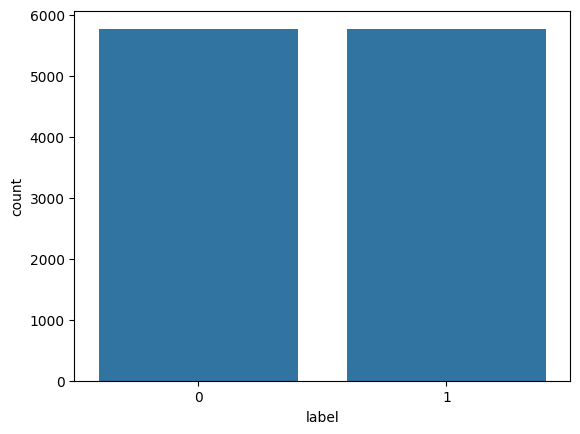

In [120]:
import seaborn as sns

sns.countplot(x='label', data=df)

### Creating wordcloud

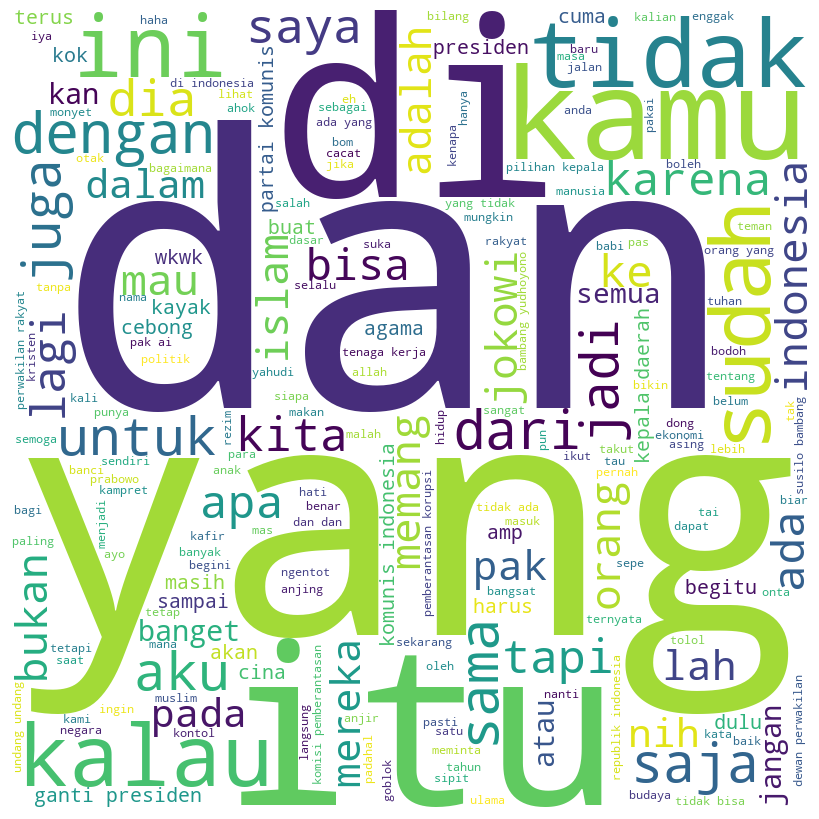

In [121]:
wc = ''

for words in df['text'].values:
  wc += ' '+words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Creating word index

In [122]:
import re

def generate_word_index(texts):
    word_index = {}
    index = 1  # Start indexing from 1, reserve index 0 for unknown words
    for text in texts:
        tokens = re.findall(r'\w+', text.lower())
        for token in tokens:
            if token not in word_index:
                word_index[token] = index
                index += 1
    return word_index

word_index = generate_word_index(df['text'].values)
len(word_index)

18568

### Calculating longest text by words

In [123]:
longest_text = 0
for text in df['text'].values:
  if len(text.split(' ')) > longest_text:
    longest_text = len(text.split(' '))

longest_text

65

### Tokenizing words based on created word index

In [124]:
df_ready_to_train = df.copy()
df_ready_to_train['token'] = df_ready_to_train['text'].apply(lambda text: [word_index.get(word, 0) for word in re.split(r'\W+', text.lower())])

In [125]:
import tensorflow as tf

df_ready_to_train['token'] = list(tf.keras.preprocessing.sequence.pad_sequences(df_ready_to_train['token'], maxlen=longest_text, padding='post'))

In [126]:
df_ready_to_train = df_ready_to_train.drop(columns=['text'])

## Saving Data

In [92]:
SAVE_PATH = '../Datasets/processed-id-11k/'

### Creating Map

In [93]:
metadata = {}

### Saving general information

In [94]:
from datetime import datetime

metadata['name'] = 'optimalisasi-model-machine-learning-untuk-klasifikasi-ujaran-kebencian-pada-x-twitter'
metadata['author'] = 'doddy-s'
metadata['created_at'] = datetime.now().isoformat()
metadata['meta'] = {}

### Saving dataset metadata

In [95]:
dataset_file_name = 'indonesian-hate-speech-processed-dataset'
dataset_file_format = 'csv'

metadata['meta']['dataset'] = {}
metadata['meta']['dataset']['longest_text'] = longest_text
metadata['meta']['dataset']['count'] = int(df_ready_to_train['token'].count())
metadata['meta']['dataset']['file_name'] = dataset_file_name
metadata['meta']['dataset']['file_format'] = dataset_file_format

### Saving dataset-ready-to-train metadata

In [96]:
dataset_ready_to_train_file_name = 'indonesian-hate-speech-processed-dataset-ready-to-train'
dataset_ready_to_train_file_format = 'parquet'

metadata['meta']['dataset_ready_to_train'] = {}
metadata['meta']['dataset_ready_to_train']['longest_text'] = longest_text
metadata['meta']['dataset_ready_to_train']['count'] = int(df_ready_to_train['token'].count())
metadata['meta']['dataset_ready_to_train']['file_name'] = dataset_ready_to_train_file_name
metadata['meta']['dataset_ready_to_train']['file_format'] = dataset_ready_to_train_file_format

### Saving word index metadata

In [97]:
word_index_file_name = 'indonesian-hate-speech-processed-word-index'
word_index_file_format = 'json'

metadata['meta']['word_index'] = {}
metadata['meta']['word_index']['count'] = len(word_index)
metadata['meta']['word_index']['file_name'] = word_index_file_name
metadata['meta']['word_index']['file_format'] = word_index_file_format

### Exporting metadata to json file

In [98]:
import json

with open(SAVE_PATH+'metadata.json', 'w') as json_file:
  json.dump(metadata, json_file, indent=2)

### Exporting datasets

In [99]:
df.to_csv(SAVE_PATH+dataset_file_name+'.'+dataset_file_format, index=False, encoding='utf-8')
df_ready_to_train.to_parquet(SAVE_PATH+dataset_ready_to_train_file_name+'.'+dataset_ready_to_train_file_format)

with open(SAVE_PATH+word_index_file_name+'.'+word_index_file_format, 'w') as json_file:
  json.dump(word_index, json_file, indent=2)